# Introduction to scientific computing with Python

*Merci à [Maxime Sangnier](http://www.lpsm.paris/pageperso/sangnier/) d'avoir partagé avec nous ses TPs.*

## Part 4: Statistics

# Table of contents
1. [Sampling](#part1)
    - [Random sampling](#part1sec1)
    - [Advanced distributions](#part1sec2)
    - [Descriptive statistics](#part1sec3)
1. [Data representation and manipulation](#part2)
    - [Reading and creating a dataframe](#part2sec1)
    - [Viewing data](#part2sec2)
    - [Indexing a table](#part2sec3)
    - [Adding and deleting items](#part2sec4)
    - [Managing missing data](#part2sec5)
    - [Descriptive statistics](#part2sec6)
    - [Plotting](#part2sec8)
1. [Linear Regression with the Iris data set](#part3)
1. [Exercises](#part4)
1. [References](#part5)


# Sampling and testing <a id="part1"></a>
## Random sampling <a id="part1sec1"></a>
### Simple random data
[Numpy](http://docs.scipy.org/doc/numpy/reference/routines.random.html#random-generator) offers several routines to generate easily uniform and normal random samples:

In [36]:
import numpy as np
import numpy.random as rdm
np.set_printoptions(precision=2)

rdm.rand(4, 4)  # Uniform sampling

array([[0.72, 0.63, 0.68, 0.  ],
       [0.6 , 0.55, 0.16, 0.52],
       [0.37, 0.33, 0.05, 0.65],
       [0.78, 0.05, 0.9 , 0.6 ]])

In [2]:
rdm.randn(4, 4)  # Standard normal sampling

array([[-0.1 , -0.31, -0.02,  1.77],
       [ 0.94, -2.54,  0.53,  0.06],
       [ 0.43, -1.12,  1.28,  2.31],
       [-0.23,  1.25,  0.23, -1.09]])

In [3]:
rdm.randint(0, 10, size=(2, 3))  # Discrete uniform sampling (10 exclusive)

array([[2, 6, 0],
       [6, 9, 2]])

In the case where the sampled integers are supposed to index an array, one can replace:

In [4]:
a = np.arange(10)*10

ind = rdm.randint(0, 5, size=7)
a[ind]

array([10, 40, 20, 10, 30, 10, 10])

by:

In [5]:
rdm.choice(a, size=7)

array([90, 70, 50, 50, 10, 40, 90])

The previous routines sample integers with replacement.
To sample without replacement, one can use:

In [6]:
rdm.permutation(10)[:7]  # 7 first items of a random permutation of [0, …, 9]

array([2, 6, 7, 3, 4, 8, 1])

Note that one can also directly permute an array with a copy (`permutation`) or in-place (`shuffle`), instead of generating random indexes.

In [7]:
rdm.permutation(a)

array([40, 70,  0, 30, 50, 80, 90, 20, 10, 60])

In [8]:
rdm.shuffle(a)
a

array([80, 70,  0, 50, 30, 20, 60, 10, 40, 90])

**Question**

Draw a sample of size $100$ from a normal distribution with mean $10$ and standard deviation $2$.
Print the usual estimators of these two parameters to validate your operation.

In [ ]:
# Answer

### Random generator
It is obvious that random generators used in scientific computing are in fact pseudo-random generators.
As a consequence, the practitioner is able to control them to a certain extent.
In a way, this is good news for reproducible science!

Both examples below illustrate how to replay a random sampling.

In [10]:
for it in range(3):
    rdm.seed(it)  # Seed the generator to the current iteration number
    print(rdm.randint(100, size=3))

[44 47 64]
[37 12 72]
[40 15 72]


In [11]:
for it in range(3):
    rdm.seed(it)  # Seed the generator to the current iteration number
    print(rdm.randint(100, size=3))  # Same as before!

[44 47 64]
[37 12 72]
[40 15 72]


In [12]:
s = rdm.get_state()  # Get the internal state of the generator
print(np.array([rdm.randn() for it in range(3)]))
print(rdm.rand(3, 3))

[-2.14  1.64 -1.79]
[[0.2  0.62 0.3 ]
 [0.27 0.62 0.53]
 [0.13 0.51 0.18]]


In [13]:
rdm.set_state(s)  # Set the internal state of the generator to its previous value
for it in range(3):
    print(rdm.randn(1))  # Same as before!

[-2.14]
[1.64]
[-1.79]


### Distributions
Besides the previous routines, Numpy offers the possibility to draw samples from numerous [distributions](http://docs.scipy.org/doc/numpy/reference/routines.random.html#distributions).

In [14]:
x = rdm.poisson(lam=4, size=500)
print(x[:30])

[3 4 5 2 2 2 4 6 6 3 2 1 6 2 5 3 3 5 3 6 7 6 5 3 2 3 2 4 4 3]


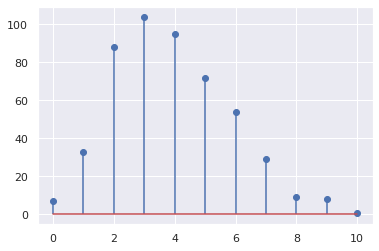

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

fig, ax = plt.subplots()
ax.stem(np.bincount(x), use_line_collection=True);

**Question**

Draw a sample of size $1000$ from an exponential distribution with scale $2$ and plot a density histogram of this sample.

In [ ]:
# Answer

## Advanced distributions <a id="part1sec2"></a>
### Special functions
Many raw statistical routines (cumulative, survival and inverse functions) are available in the [scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html#raw-statistical-functions) mudule.

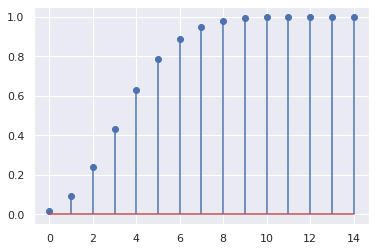

In [17]:
from scipy import special

plt.stem(special.pdtr(range(15), 4), use_line_collection=True);  # Poisson cumulative distribution function

### Random variables
[Scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html) implements random variables with two different classes: [*continuous random variables*](http://docs.scipy.org/doc/scipy/reference/tutorial/stats/continuous.html#continuous-random-variables) and [*discrete random variables*](http://docs.scipy.org/doc/scipy/reference/tutorial/stats/discrete.html#discrete-random-variables).
As an example, we focus here on the gamma distribution and illustrate the main methods available.

In [1]:
from scipy.stats import gamma

# gamma is a r.v. object corresponding to the standard gamma distribution

The shape parameter `a` appears in the probability density function:
<!-- $$f(x; a, \lambda) = x^{a-1}\exp(-\lambda x) \frac{\lambda^a}{\Gamma(a)}.$$ -->
$$f(x; a) = \frac{x^{a-1}\exp(-x)}{\Gamma(a)}.$$

Since the shape parameter `a` is required, one has to specify it for each method.

In [2]:
print("Mean:", gamma.mean(a=4))
print("Median:", gamma.median(a=4))
print("Variance:", gamma.var(a=4))

Mean: 4.0
Median: 3.672060748850897
Variance: 4.0


Two other parameters can be passed to the methods: `loc` and `scale`.
They correspond to shifting and rescaling the standard random variable with 
$x \mapsto scale \cdot x + loc.$

In [3]:
print("Mean:", gamma.mean(a=4, loc=2, scale=0.1))

Mean: 2.4


Since passing those parameters time and again can become quite bothersome, one can freeze the parameters:

In [21]:
rv = gamma(a=4, loc=2, scale=2)
print("Mean:", rv.mean())

Mean: 10.0


Now, let us have a look at the available methods.

In [22]:
print(rv.rvs(size=10))  # Draw a random sample

[ 6.56 17.46 24.21  7.11  9.63  5.71  8.27  7.46  9.37 14.17]


In [23]:
for n in range(4):
    print("Moment {}:".format(n), rv.moment(n))

Moment 0: 1.0
Moment 1: 10.0
Moment 2: 116.0
Moment 3: 1544.0


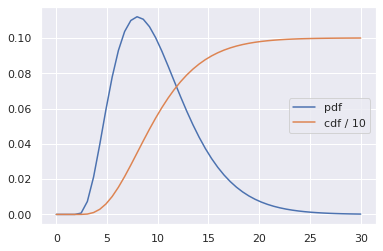

In [24]:
x = np.linspace(0, 30, num=50)

fig, ax = plt.subplots()
ax.plot(x, rv.pdf(x), label='pdf')  # Probability density function
ax.plot(x, rv.cdf(x)/10, label='cdf / 10')  # Cumulative density function
ax.legend(loc="best");

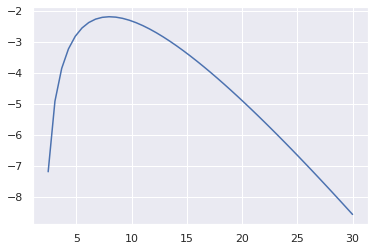

In [25]:
fig, ax = plt.subplots()
ax.plot(x, rv.logpdf(x), label='log pdf');  # Log of the pdf

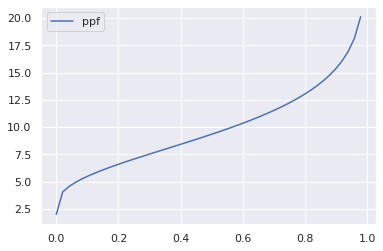

In [26]:
x = np.linspace(0, 1, num=50)

fig, ax = plt.subplots()
ax.plot(x, rv.ppf(x), label='ppf')  # Percent point function (inverse of cdf, also called quantile function) 
ax.legend(loc="upper left");

In [27]:
m = rv.expect(lambda x: np.exp(-x))  # Expectation of a function
print("First exponential moment: {0:0.2e}".format(m))

First exponential moment: 1.67e-03


Note that an unfrozen random variable (for instance `gamma`, not `rv`) benefits from two other methods: `fit` and `fit_loc_scale` for estimating parameters respectively by likelihood maximization and the moment method.

**Question**

Draw a sample of size $1000$ from a Laplace distribution (with location $1$ and scale $2$) and plot a density histogram of this sample.
Add the curve of the probability density function.

In [ ]:
# Answer

## Descriptive statistics <a id="part1sec3"></a>
### Order statistics, moments and correlation
Basic descriptive statistics such as min, max, mean, median, std, variance and percentiles can be computed with [array methods](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html) or routines from [Numpy](http://docs.scipy.org/doc/numpy/reference/routines.statistics.html).
Other empirical statistics such as mode and moments can be obtained with [Scipy statistical functions](http://docs.scipy.org/doc/scipy/reference/stats.html#statistical-functions).

### Histograms
A common task in statisics is to estimate the probability density function of a random variable, what is called density estimation.
In a first approach, this task can be achieved by computing a histogram.

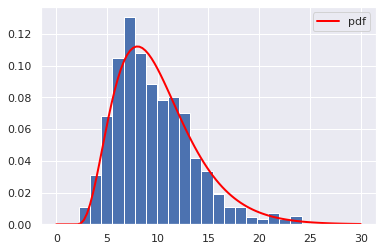

In [29]:
x = rv.rvs(size=1000)  # Draw a random sample

# Compute the histogram
hist, bins = np.histogram(x, bins=20, density=True)

# Plot the histogram
fig, ax = plt.subplots()
ax.bar(bins[:-1], hist, width=bins[1]-bins[0])
ax.set_xticks(bins[::3], ["{0:0.2f}".format(t) for t in bins[::3]]);

x_pdf = np.linspace(0, 30, num=100)
ax.plot(x_pdf, rv.pdf(x_pdf), color="red", linewidth=2, label="pdf")
ax.legend();

Alternatively, one can use Matplotlib to produce fancy plots:

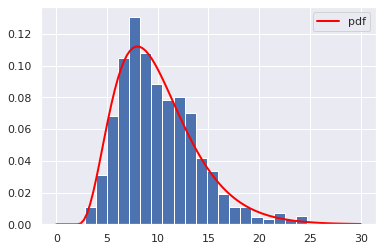

In [30]:
fig, ax = plt.subplots()
hist_plt, bins_plt, patches = ax.hist(x, bins=20, density=True)
ax.plot(x_pdf, rv.pdf(x_pdf), color="red", linewidth=2, label="pdf")
ax.legend();

### Kernel density estimation
Kernel desity estimation is a tool more efficient than a histogram for density estimation.
In Python, kernel density estimation can be performed with the `gaussian_kde` function.

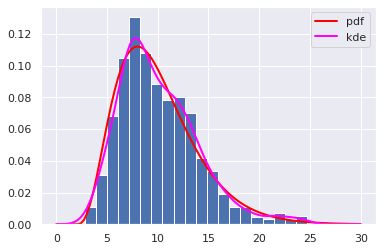

In [31]:
from scipy.stats import gaussian_kde

kde = gaussian_kde(x)

fig, ax = plt.subplots()
(hist_plt, bins_plt, patches) = ax.hist(x, bins=20, density=True)
ax.plot(x_pdf, rv.pdf(x_pdf), color="red", linewidth=2, label="pdf")
ax.plot(x_pdf, kde(x_pdf), color="magenta", linewidth=2, label="kde")
ax.legend();

**Question**
Add on the previous figure the curves of a kernel density estimation with parameter `bw_method` (of `gaussian_kde`) varying according to `bw_values`.

In [32]:
bw_values = [0.1, 0.5, 1]

In [ ]:
# Answer

# Data representation and manipulation <a id="part2"></a>
Following the example of R, Python comes with a package for handling data as a table : the [Pandas](http://pandas.pydata.org/) package provides a container for tables, called **dataframe**.
A dataframe is a two-dimensional table, in which each column contains measurements on one variable, and each row contains one individual.

The main features of Pandas and its dataframe are:
- reading data from csv and Excel files;
- giving names to variables;
- storing in a clever manner a large amound of data;
- providing methods for descriptive statistics.

## Reading and creating a dataframe <a id="part2sec1"></a>
A dataframe may be either read from a file or created from raw data (the file is available [here](http://bertrand.michel.perso.math.cnrs.fr/Enseignements/Data/defra_consumption.csv)):

In [7]:
!cat defra_consumption.csv

;England;Wales;Scotland;N Ireland
Cheese;105;103;103;66
Carcass meat;245;227;242;267
Other meat;685;803;750;586
Fish;147;160;122;93
Fats and oils;193;235;184;209
Sugars;156;175;147;139
Fresh potatoes;720;874;566;1033
Fresh Veg;253;265;171;143
Other Veg;488;570;418;355
Processed potatoes;198;203;220;187
Processed Veg;360;365;337;334
Fresh fruit;1102;1137;957;674
Cereals;1472;1582;1462;1494
Beverages;57;73;53;47
Soft drinks;1374;1256;1572;1506
Alcoholic drinks;375;475;458;135
Confectionery;54;64;62;41


In [5]:
import numpy as np
import pandas as pd

consumption = pd.read_csv('defra_consumption.csv', sep=';', index_col=0)
consumption

,England,Wales,Scotland,N Ireland
Cheese,105,103,103,66
Carcass meat,245,227,242,267
Other meat,685,803,750,586
Fish,147,160,122,93
Fats and oils,193,235,184,209
Sugars,156,175,147,139
Fresh potatoes,720,874,566,1033
Fresh Veg,253,265,171,143
Other Veg,488,570,418,355
Processed potatoes,198,203,220,187


In [6]:
timeseries = pd.DataFrame(data=np.random.randn(6,4),
                          index=pd.date_range('20130101', periods=6),
                          columns=list('ABCD'))
timeseries

,A,B,C,D
2013-01-01,-1.318219,1.268203,-0.563872,0.820811
2013-01-02,0.081261,-1.382097,0.567375,2.086866
2013-01-03,2.680484,-2.655466,0.818241,0.129595
2013-01-04,0.234514,-0.517613,1.186406,-0.214957
2013-01-05,1.727123,0.024707,-1.429049,0.954067
2013-01-06,-0.536418,0.538629,-0.583425,-0.184966


In [47]:
df = pd.DataFrame({'A' : 1.,  # Single item
                    'B' : pd.Timestamp('20130102'),  # Single item
                    'C' : np.random.randn(4),  # Multiple item
                    'D' : pd.Categorical(["test", "train", "test", "train"])})
df

,A,B,C,D
0,1.0,2013-01-02,-0.138763,test
1,1.0,2013-01-02,0.060227,train
2,1.0,2013-01-02,-0.429151,test
3,1.0,2013-01-02,1.244043,train


**Question**

Create a dataframe, the columns of which are entitled `normal`, `exponential` and `laplace`, and contain random samples of size $10$ of each distribution.

In [ ]:
# Answer

## Viewing data <a id="part2sec2"></a>
Since it is unrealistic to view a table in whole, Pandas provides different methods to give a sneak look at the aforesaid table.

In [49]:
timeseries.index  # Index of the table

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [50]:
consumption.index  # Index of the table

Index(['Cheese', 'Carcass meat', 'Other meat', 'Fish', 'Fats and oils',
       'Sugars', 'Fresh potatoes', 'Fresh Veg', 'Other Veg',
       'Processed potatoes', 'Processed Veg', 'Fresh fruit', 'Cereals',
       'Beverages', 'Soft drinks', 'Alcoholic drinks', 'Confectionery'],
      dtype='object')

In [51]:
consumption.columns  # Columns of the table

Index(['England', 'Wales', 'Scotland', 'N Ireland'], dtype='object')

In [52]:
consumption.head(n=3)

,England,Wales,Scotland,N Ireland
Cheese,105,103,103,66
Carcass meat,245,227,242,267
Other meat,685,803,750,586


In [53]:
consumption.tail(n=3)

,England,Wales,Scotland,N Ireland
Soft drinks,1374,1256,1572,1506
Alcoholic drinks,375,475,458,135
Confectionery,54,64,62,41


In [54]:
consumption.values  # Values are in a Numpy array

array([[ 105,  103,  103,   66],
       [ 245,  227,  242,  267],
       [ 685,  803,  750,  586],
       [ 147,  160,  122,   93],
       [ 193,  235,  184,  209],
       [ 156,  175,  147,  139],
       [ 720,  874,  566, 1033],
       [ 253,  265,  171,  143],
       [ 488,  570,  418,  355],
       [ 198,  203,  220,  187],
       [ 360,  365,  337,  334],
       [1102, 1137,  957,  674],
       [1472, 1582, 1462, 1494],
       [  57,   73,   53,   47],
       [1374, 1256, 1572, 1506],
       [ 375,  475,  458,  135],
       [  54,   64,   62,   41]])

The methods `info` and `describe` give respectively general and quantitative information concerning the dataframe.
In particular, `info` indicates the categorical variables (which are not treated by `describe`).

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
A    4 non-null float64
B    4 non-null datetime64[ns]
C    4 non-null float64
D    4 non-null category
dtypes: category(1), datetime64[ns](1), float64(2)
memory usage: 324.0 bytes


In [56]:
df.describe()

,A,C
count,4.0,4.000000
mean,1.0,0.184089
std,0.0,0.734652
min,1.0,-0.429151
25%,1.0,-0.211360
50%,1.0,-0.039268
75%,1.0,0.356181
max,1.0,1.244043


If you suspect a variable to be categorical, you can state it.

In [57]:
df['E'] = np.random.randint(0, high=2, size=df.shape[0])
df['E'] = df['E'].astype('category')
df

,A,B,C,D,E
0,1.0,2013-01-02,-0.138763,test,0
1,1.0,2013-01-02,0.060227,train,1
2,1.0,2013-01-02,-0.429151,test,1
3,1.0,2013-01-02,1.244043,train,0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
A    4 non-null float64
B    4 non-null datetime64[ns]
C    4 non-null float64
D    4 non-null category
E    4 non-null category
dtypes: category(2), datetime64[ns](1), float64(2)
memory usage: 424.0 bytes


In [59]:
timeseries.sort_index(ascending=False)

,A,B,C,D
2013-01-06,0.308346,-0.164241,0.446200,0.744765
2013-01-05,-1.305641,0.480583,-0.135586,0.421599
2013-01-04,-1.595424,0.257599,0.202211,-2.483426
2013-01-03,1.075539,-0.549968,-1.587368,0.389060
2013-01-02,-0.897261,-1.181121,1.017547,1.058445
2013-01-01,-0.429630,2.257868,-0.765199,1.047689


In [60]:
timeseries.sort_values(by='A')

,A,B,C,D
2013-01-04,-1.595424,0.257599,0.202211,-2.483426
2013-01-05,-1.305641,0.480583,-0.135586,0.421599
2013-01-02,-0.897261,-1.181121,1.017547,1.058445
2013-01-01,-0.429630,2.257868,-0.765199,1.047689
2013-01-06,0.308346,-0.164241,0.446200,0.744765
2013-01-03,1.075539,-0.549968,-1.587368,0.389060


**Question**

Print the first 10 lines of the dataframe `consumption`.

In [ ]:
# Answer

## Indexing a table <a id="part2sec3"></a>
### Natural indexing

Explanations are provided with the `consumption` dataframe.

In [62]:
consumption.head()

,England,Wales,Scotland,N Ireland
Cheese,105,103,103,66
Carcass meat,245,227,242,267
Other meat,685,803,750,586
Fish,147,160,122,93
Fats and oils,193,235,184,209


Natural indexing is performed with `[]`.
This indexes the **columns** of dataframes and the **rows** of series.

In [63]:
consumption['England']

Cheese                 105
Carcass meat           245
Other meat             685
Fish                   147
Fats and oils          193
Sugars                 156
Fresh potatoes         720
Fresh Veg              253
Other Veg              488
Processed potatoes     198
Processed Veg          360
Fresh fruit           1102
Cereals               1472
Beverages               57
Soft drinks           1374
Alcoholic drinks       375
Confectionery           54
Name: England, dtype: int64

In [64]:
s = consumption['England']  # A series
s['Cheese']

105

You may want to extract several columns or several rows.

In [65]:
consumption[['England', 'Scotland']].head()

,England,Scotland
Cheese,105,103
Carcass meat,245,242
Other meat,685,750
Fish,147,122
Fats and oils,193,184


In [66]:
s[['Cheese', 'Other meat']]

Cheese        105
Other meat    685
Name: England, dtype: int64

**Remark:** selecting with `[[]]` always return a dataframe.

In [67]:
consumption[['England']].head()

,England
Cheese,105
Carcass meat,245
Other meat,685
Fish,147
Fats and oils,193


**Question**

Print together columns `B` and `D` of the dataframe `df`.

In [ ]:
# Answer

### Label based indexing

Label based indexing is an enhancement of natural indexing, accessible with `.loc[]`.
Indexing has to be thought *as a matrix but with labels instead of positions*.
Hence, the **rows** are indexed first (instead of the columns with `[]`).

In [69]:
consumption.loc['Cheese']  # Single row

England      105
Wales        103
Scotland     103
N Ireland     66
Name: Cheese, dtype: int64

In [70]:
consumption.loc[:, 'England'].head()  # Single column

Cheese           105
Carcass meat     245
Other meat       685
Fish             147
Fats and oils    193
Name: England, dtype: int64

In [71]:
consumption.loc[['Cheese', 'Fresh potatoes']]  # Multiple rows

,England,Wales,Scotland,N Ireland
Cheese,105,103,103,66
Fresh potatoes,720,874,566,1033


Slicing on rows and columns is possible but **endpoints are included**.

In [72]:
consumption.loc['Cheese':'Fish']  # Row slicing

,England,Wales,Scotland,N Ireland
Cheese,105,103,103,66
Carcass meat,245,227,242,267
Other meat,685,803,750,586
Fish,147,160,122,93


In [73]:
consumption.loc['Cheese':'Cereals':4]  # Row slicing (from Cheese to Cereals with step 2)

,England,Wales,Scotland,N Ireland
Cheese,105,103,103,66
Fats and oils,193,235,184,209
Other Veg,488,570,418,355
Cereals,1472,1582,1462,1494


In [74]:
consumption.loc['Cheese':'Cereals':4, :'Wales']  # Row and column slicing

,England,Wales
Cheese,105,103
Fats and oils,193,235
Other Veg,488,570
Cereals,1472,1582


**Question**

What is the value in the dataframe `timeseries` at row `2013-01-04` and column `B`?

In [ ]:
# Answer

### Integer position based indexing

Interger location (or position) based indexing is done with `.iloc[]`.
It is similar to `.loc[]` but consideres only integer positions instead of labels.

**Remark:** endpoints are not included (similarly to Numpy).

In [76]:
consumption.iloc[:2]

,England,Wales,Scotland,N Ireland
Cheese,105,103,103,66
Carcass meat,245,227,242,267


In [77]:
consumption.iloc[10::4, ::2]

,England,Scotland
Processed Veg,360,337
Soft drinks,1374,1572


### Boolean indexing
Similarly to Numpy arrays, dataframes can be indexed with Boolean variables thanks to `.loc[]`.

In [78]:
consumption.loc[consumption['England'] > 500]  # Row selection

,England,Wales,Scotland,N Ireland
Other meat,685,803,750,586
Fresh potatoes,720,874,566,1033
Fresh fruit,1102,1137,957,674
Cereals,1472,1582,1462,1494
Soft drinks,1374,1256,1572,1506


In [79]:
consumption.loc[consumption['England'] > 500, consumption.loc['Other meat'] < 800]  # Row and column selection

,England,Scotland,N Ireland
Other meat,685,750,586
Fresh potatoes,720,566,1033
Fresh fruit,1102,957,674
Cereals,1472,1462,1494
Soft drinks,1374,1572,1506


Operating on the whole dataframe puts `NaN` where the condition is not satisfied.
Beyond that, it is useful for assignments.

In [80]:
timeseries[timeseries > 0]  # Set NaN where condition is not satisfied

,A,B,C,D
2013-01-01,NaN,2.257868,NaN,1.047689
2013-01-02,NaN,NaN,1.017547,1.058445
2013-01-03,1.075539,NaN,NaN,0.389060
2013-01-04,NaN,0.257599,0.202211,NaN
2013-01-05,NaN,0.480583,NaN,0.421599
2013-01-06,0.308346,NaN,0.446200,0.744765


In [81]:
tt = timeseries.copy()
tt[tt < 0] = 0
tt

,A,B,C,D
2013-01-01,0.000000,2.257868,0.000000,1.047689
2013-01-02,0.000000,0.000000,1.017547,1.058445
2013-01-03,1.075539,0.000000,0.000000,0.389060
2013-01-04,0.000000,0.257599,0.202211,0.000000
2013-01-05,0.000000,0.480583,0.000000,0.421599
2013-01-06,0.308346,0.000000,0.446200,0.744765


The `isin` method enables selecting with an OR condition.

In [82]:
df.loc[df['D'].isin(['test', 'train'])]

,A,B,C,D,E
0,1.0,2013-01-02,-0.138763,test,0
1,1.0,2013-01-02,0.060227,train,1
2,1.0,2013-01-02,-0.429151,test,1
3,1.0,2013-01-02,1.244043,train,0


**Question**

Select rows of `df` with $1$ in column `E`.

In [ ]:
# Answer

### Selection random samples

The `sample` method makes it possible to randomly select rows (individuals) from a dataframe (without replacement).

In [89]:
consumption.sample(n=3)

,England,Wales,Scotland,N Ireland
Confectionery,54,64,62,41
Fresh Veg,253,265,171,143
Fresh fruit,1102,1137,957,674


## Adding and deleting items <a id="part2sec4"></a>
Let us consider a copy of the first 5 rows of `consumption`.

In [90]:
cons = consumption.iloc[:5].copy()
cons

,England,Wales,Scotland,N Ireland
Cheese,105,103,103,66
Carcass meat,245,227,242,267
Other meat,685,803,750,586
Fish,147,160,122,93
Fats and oils,193,235,184,209


We successively add a column and a row to `cons`.

In [91]:
cons['all'] = cons.sum(axis=1)
cons.loc['Chocolate'] = [70, 60, 60, 150, 340]
cons

,England,Wales,Scotland,N Ireland,all
Cheese,105,103,103,66,377
Carcass meat,245,227,242,267,981
Other meat,685,803,750,586,2824
Fish,147,160,122,93,522
Fats and oils,193,235,184,209,821
Chocolate,70,60,60,150,340


That we can now drop.

In [92]:
cons = cons.drop('Chocolate')
cons = cons.drop('all', axis=1)
cons

,England,Wales,Scotland,N Ireland
Cheese,105,103,103,66
Carcass meat,245,227,242,267
Other meat,685,803,750,586
Fish,147,160,122,93
Fats and oils,193,235,184,209


Dataframes can be concatenated along columns and rows.

In [93]:
pd.concat((cons[['England']], cons[['Scotland']]), axis=1)

,England,Scotland
Cheese,105,103
Carcass meat,245,242
Other meat,685,750
Fish,147,122
Fats and oils,193,184


In [94]:
pd.concat((cons.iloc[:2], cons.iloc[-2:]))

,England,Wales,Scotland,N Ireland
Cheese,105,103,103,66
Carcass meat,245,227,242,267
Fish,147,160,122,93
Fats and oils,193,235,184,209


This last operation is similar to:

In [95]:
cons.iloc[:2].append(cons.iloc[-2:])

,England,Wales,Scotland,N Ireland
Cheese,105,103,103,66
Carcass meat,245,227,242,267
Fish,147,160,122,93
Fats and oils,193,235,184,209


## Managing missing data <a id="part2sec5"></a>
Missing data are generally replaced by a `NaN` in the table.
Pandas offers several possibilities to manage them.

In [96]:
cons_md = consumption[consumption>200]
cons_md.iloc[:, -1] = consumption.iloc[:, -1]
cons_md.head()  # A table with missing data

,England,Wales,Scotland,N Ireland
Cheese,NaN,NaN,NaN,66
Carcass meat,245.0,227.0,242.0,267
Other meat,685.0,803.0,750.0,586
Fish,NaN,NaN,NaN,93
Fats and oils,NaN,235.0,NaN,209


In [97]:
cons_md.dropna()  # Drop any row with missing data

,England,Wales,Scotland,N Ireland
Carcass meat,245.0,227.0,242.0,267
Other meat,685.0,803.0,750.0,586
Fresh potatoes,720.0,874.0,566.0,1033
Other Veg,488.0,570.0,418.0,355
Processed Veg,360.0,365.0,337.0,334
Fresh fruit,1102.0,1137.0,957.0,674
Cereals,1472.0,1582.0,1462.0,1494
Soft drinks,1374.0,1256.0,1572.0,1506
Alcoholic drinks,375.0,475.0,458.0,135


In [98]:
cons_md.fillna(method='ffill').head()  # Fill missing data with previous real values
# This does not work with the first line

,England,Wales,Scotland,N Ireland
Cheese,NaN,NaN,NaN,66
Carcass meat,245.0,227.0,242.0,267
Other meat,685.0,803.0,750.0,586
Fish,685.0,803.0,750.0,93
Fats and oils,685.0,235.0,750.0,209


In [99]:
cons_md.fillna(method='ffill').fillna(method='bfill').head()

,England,Wales,Scotland,N Ireland
Cheese,245.0,227.0,242.0,66
Carcass meat,245.0,227.0,242.0,267
Other meat,685.0,803.0,750.0,586
Fish,685.0,803.0,750.0,93
Fats and oils,685.0,235.0,750.0,209


In [100]:
cons_md.isnull().any()  # Test for missing data

England       True
Wales         True
Scotland      True
N Ireland    False
dtype: bool

**Question**

By changing the `axis` parameter of `dropna`, drop the columns with missing values of `cons_md`.

In [ ]:
# Answer

## Descriptive statistics <a id="part2sec6"></a>
A dataframe comes with many methods for descriptive statistics:
- `count`: 	Number of non-null observations;
- `sum`: 	Sum of values;
- `mean`: 	Mean of values;
- `mad`: 	Mean absolute deviation;
- `median`: 	Arithmetic median of values;
- `min`: 	Minimum;
- `max`: 	Maximum;
- `mode`: 	Mode;
- `abs`: 	Absolute Value;
- `prod`: 	Product of values;
- `std`: 	Bessel-corrected sample standard deviation;
- `var`: 	Unbiased variance;
- `sem`: 	Standard error of the mean;
- `skew`: 	Sample skewness (3rd moment);
- `kurt`: 	Sample kurtosis (4th moment);
- `quantile`: 	Sample quantile (value at %);
- `cumsum`: 	Cumulative sum;
- `cumprod`: 	Cumulative product;
- `cummax`: 	Cumulative maximum;
- `cummin`: 	Cumulative minimum.

In [102]:
df.median()  # Median of numeric columns

A    1.000000
C   -0.039268
E    0.500000
dtype: float64

In [103]:
df.median(axis=1)  # Median of rows (numeric objects only)

0    0.430619
1    0.530114
2    0.285425
3    1.122021
dtype: float64

In [104]:
df['D'].value_counts()  # Histrogramming

train    2
test     2
Name: D, dtype: int64

**Question**

Compute the cumulative sum of the consumption data.

In [ ]:
# Answer

## Plotting <a id="part2sec8"></a>
### With pandas
Pandas provides a [rich collection](http://pandas.pydata.org/pandas-docs/stable/visualization.html) of techniques to vizualize dataframes.
Here, we illustrate just a few of them.

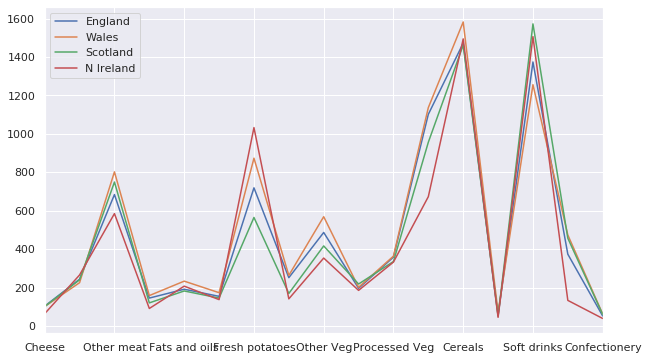

In [108]:
consumption.plot(figsize=(10, 6));  # Columns vs index

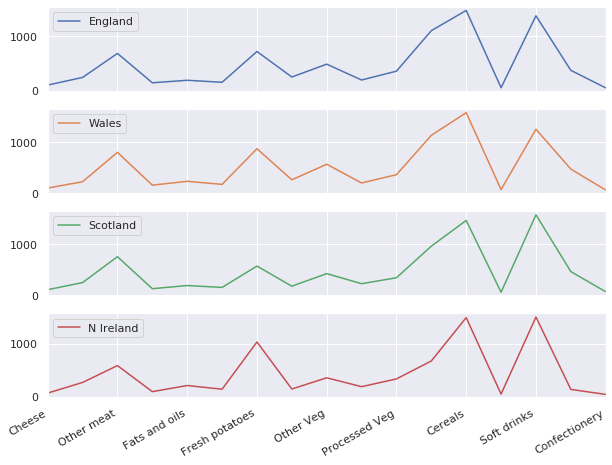

In [109]:
consumption.plot(subplots=True, figsize=(10, 8));  # Columns vs index

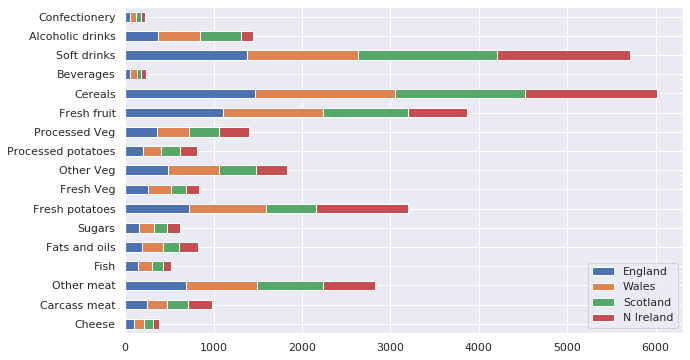

In [110]:
consumption.plot.barh(stacked=True, figsize=(10, 6));

**Question**

Plot a pie chart (parameter `kind='pie'` of `plot`) of the average consumption of foodstuff.

In [ ]:
# Answer

### With Seaborn
Besides its esthetics purpose, [Seaborn](https://seaborn.pydata.org/api.html) provides many routines for producing beautiful plots from dataframes, particularly for statistical data.

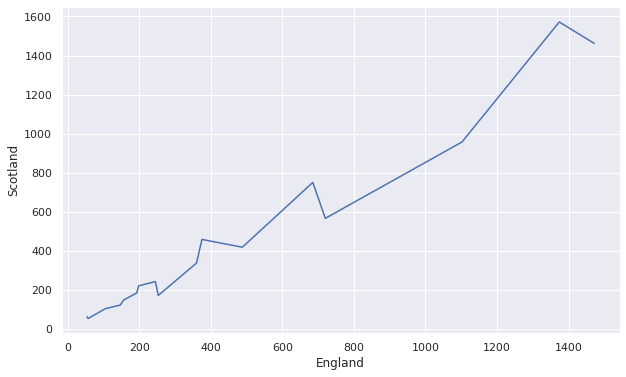

In [112]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x='England', y='Scotland', data=consumption);

In [113]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


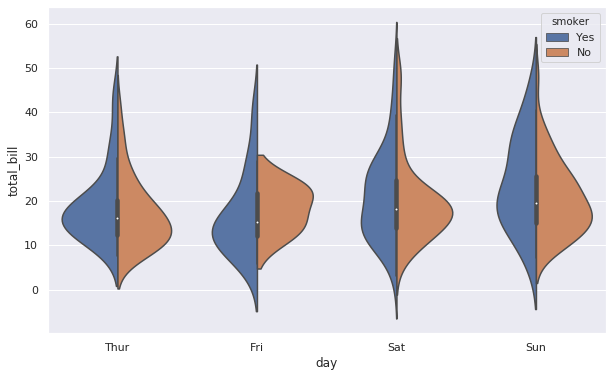

In [114]:
import warnings
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(x='day', y='total_bill', hue='smoker', split=True, data=tips);

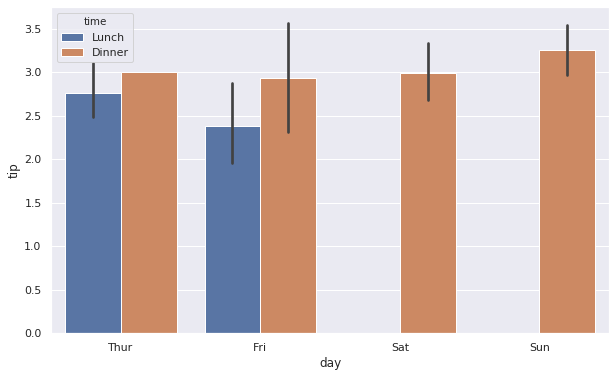

In [115]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='day', y='tip', hue='time', data=tips)

# Linear regression  <a id="part3"></a>

[StatsModels](http://statsmodels.sourceforge.net/stable/index.html) is a scientific module based on Pandas for performing statistical analyses in Python.
It provides tools for conducting data exploration, statistical tests and for the estimation of several statistical models.
As a statistical package, each estimator in StatsModels comes with an extensive list of resulting statistics.

We illustrate here a major feature of StatsModels, which is [linear regression](http://www.statsmodels.org/stable/regression.html#technical-documentation).
## Simple example

In [116]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# Generate data
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.]

y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

y[np.random.permutation(y.size)[:3]] += 4 * (-1)**np.random.randint(0, 2, size=3)  # 3 outliers

In [117]:
# Fit the model
model = sm.OLS(y, X)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     46.15
Date:                Wed, 26 Aug 2020   Prob (F-statistic):           6.45e-14
Time:                        13:14:29   Log-Likelihood:                -73.064
No. Observations:                  50   AIC:                             154.1
Df Residuals:                      46   BIC:                             161.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4958      0.057      8.672      0.000       0.381       0.611
x2             0.7785      0.225      3.464      0.001       0.326       1.231
x3            -0.0205      0.005     -4.093      0.000      -0.031      -0.010
const          5.1553      0.371     13.906      0.000       4.409       5.902
==============================================================================
Omnibus:                       41.161   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              345.917
Skew:                           1.658   Prob(JB):                     7.67e-76
Kurtosis:                      15.452   Cond. No.                         221.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Main attributes of the fitted model are:

In [118]:
print('Parameters: ', res.params)
print('Standard errors: ', res.bse)
print('Predicted values: ', res.fittedvalues)

Parameters:  [ 0.5   0.78 -0.02  5.16]
Standard errors:  [0.06 0.22 0.01 0.37]
Predicted values:  [ 4.64  5.23  5.77  6.2   6.51  6.68  6.73  6.7   6.62  6.55  6.53  6.62
  6.82  7.14  7.56  8.04  8.54  8.99  9.37  9.62  9.74  9.73  9.62  9.44
  9.26  9.11  9.05  9.1   9.27  9.55  9.9  10.29 10.67 10.97 11.17 11.24
 11.17 10.99 10.73 10.44 10.16  9.96  9.85  9.87 10.   10.23 10.51 10.79
 11.02 11.16]


A method called `predict` is also available for prediction with the estimator:

In [119]:
res.predict(X)  # Same as res.fittedvalues

array([ 4.64,  5.23,  5.77,  6.2 ,  6.51,  6.68,  6.73,  6.7 ,  6.62,
        6.55,  6.53,  6.62,  6.82,  7.14,  7.56,  8.04,  8.54,  8.99,
        9.37,  9.62,  9.74,  9.73,  9.62,  9.44,  9.26,  9.11,  9.05,
        9.1 ,  9.27,  9.55,  9.9 , 10.29, 10.67, 10.97, 11.17, 11.24,
       11.17, 10.99, 10.73, 10.44, 10.16,  9.96,  9.85,  9.87, 10.  ,
       10.23, 10.51, 10.79, 11.02, 11.16])

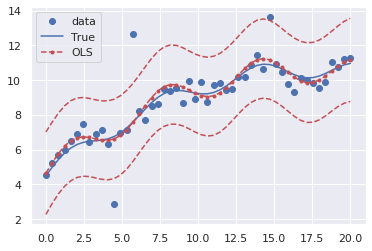

In [120]:
# Plot the regression
prstd, iv_l, iv_u = wls_prediction_std(res)  # Curves for standard deviation

fig, ax = plt.subplots()
ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best');

In [121]:
residues = y - res.predict(X)  # Same as res.resid
print(residues)

[-9.56e-02  3.60e-04 -5.25e-02 -2.06e-01 -2.61e-02  2.10e-01  7.19e-01
 -2.71e-01  2.62e-01  5.74e-01 -1.89e-01 -3.74e+00  1.43e-01 -3.85e-02
  5.10e+00  1.58e-01 -8.59e-01 -5.07e-01 -7.50e-01 -1.20e-01 -3.58e-01
 -1.74e-01 -9.44e-01  4.75e-01 -3.43e-01  7.70e-01 -2.83e-01  6.08e-01
  5.87e-01 -1.29e-01 -4.30e-01 -1.33e-01 -4.77e-01 -1.08e-01  2.57e-01
 -6.15e-01  2.47e+00 -7.23e-02 -2.46e-01 -6.36e-01 -8.28e-01  1.71e-01
  1.68e-01 -3.14e-02 -4.50e-01 -3.48e-01  5.32e-01 -2.21e-02  1.70e-01
  9.64e-02]


The sum of squared residuals (or residual sum of squares) is:

In [122]:
print(np.sum(res.resid**2), res.ssr)

54.4182341449693 54.41823414496929


while an unbiased estimate of the variance is:

In [123]:
print(res.ssr / res.df_resid, res.scale)

1.183005090108028 1.183005090108028


The hat (or projection matrix) is:

In [124]:
H = X.dot(np.linalg.solve(X.T.dot(X), X.T))

Then, the studentized residuals are:

In [125]:
t = res.resid / np.sqrt(res.scale*(1-np.diag(H)))  # Standardized residuals
ts = t * np.sqrt( (res.df_resid-1) / (res.df_resid-t**2))  # Studentized residuals
print(ts)

[-9.57e-02  3.53e-04 -5.11e-02 -2.00e-01 -2.51e-02  2.00e-01  6.81e-01
 -2.53e-01  2.45e-01  5.41e-01 -1.79e-01 -4.20e+00  1.36e-01 -3.63e-02
  6.77e+00  1.47e-01 -8.03e-01 -4.76e-01 -7.12e-01 -1.14e-01 -3.40e-01
 -1.64e-01 -8.91e-01  4.43e-01 -3.20e-01  7.26e-01 -2.68e-01  5.78e-01
  5.56e-01 -1.20e-01 -4.00e-01 -1.23e-01 -4.46e-01 -1.02e-01  2.45e-01
 -5.87e-01  2.49e+00 -6.76e-02 -2.28e-01 -5.93e-01 -7.80e-01  1.62e-01
  1.60e-01 -3.02e-02 -4.33e-01 -3.33e-01  5.12e-01 -2.14e-02  1.68e-01
  9.77e-02]


The studentized residuals can be directly obtained by:

In [126]:
print(res.outlier_test()[:, 0])

[-9.57e-02  3.53e-04 -5.11e-02 -2.00e-01 -2.51e-02  2.00e-01  6.81e-01
 -2.53e-01  2.45e-01  5.41e-01 -1.79e-01 -4.20e+00  1.36e-01 -3.63e-02
  6.77e+00  1.47e-01 -8.03e-01 -4.76e-01 -7.12e-01 -1.14e-01 -3.40e-01
 -1.64e-01 -8.91e-01  4.43e-01 -3.20e-01  7.26e-01 -2.68e-01  5.78e-01
  5.56e-01 -1.20e-01 -4.00e-01 -1.23e-01 -4.46e-01 -1.02e-01  2.45e-01
 -5.87e-01  2.49e+00 -6.76e-02 -2.28e-01 -5.93e-01 -7.80e-01  1.62e-01
  1.60e-01 -3.02e-02 -4.33e-01 -3.33e-01  5.12e-01 -2.14e-02  1.68e-01
  9.77e-02]


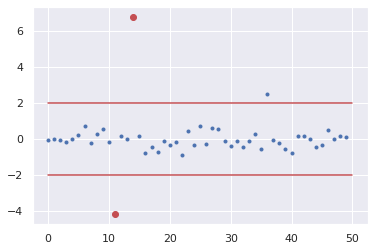

In [127]:
fig, ax = plt.subplots()
ax.plot(ts, '.')
ax.plot([0, X.shape[0]], [-2]*2, 'r')
ax.plot([0, X.shape[0]], [2]*2, 'r')

outliers = np.where(res.outlier_test()[:, -1]<0.1)
ax.plot(outliers, res.outlier_test()[outliers, 0], 'ro')

Note that studentized residuals are only asymptotically normal.

In [128]:
from scipy.stats import normaltest, probplot

print(normaltest(ts))

NormaltestResult(statistic=57.329631472186776, pvalue=3.5565482180656016e-13)


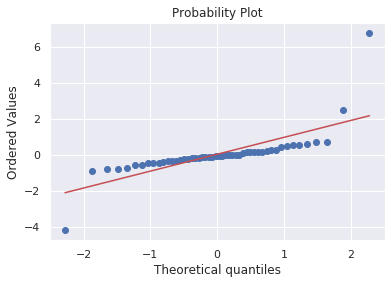

In [129]:
from scipy.stats import t as student_dist

probplot(ts, dist=student_dist(df=res.df_resid-1), plot=plt);

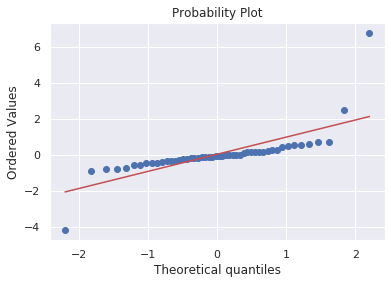

In [130]:
probplot(ts, dist='norm', plot=plt);

# Linear Regression with the Iris data set <a id="part3"></a>

[StatsModels](http://statsmodels.sourceforge.net/stable/index.html) is a scientific module based on Pandas for performing statistical analyses in Python.
It provides tools for conducting data exploration, statistical tests and for the estimation of several statistical models.
As a statistical package, each estimator in StatsModels comes with an extensive list of resulting statistics.

We illustrate here a major feature of StatsModels, which is [linear regression](http://www.statsmodels.org/stable/regression.html#technical-documentation).

Get the [Iris data set](http://archive.ics.uci.edu/ml/datasets/Iris) from R.

In [9]:
df = sm.datasets.get_rdataset('iris').data
df.columns = [name.replace('.', '_').lower() for name in df.columns]  # Make name pythonic

df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.isnull().any()  # Check if there is any missing value

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

In [11]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# define a linear model : linear link between (the expectation of) sepal_length 
# and a linear combination of  petal_length and petal_width 
model =  smf.ols('sepal_length ~ petal_length + petal_width', data=df)
# fit the model:
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sepal_length   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     241.0
Date:                Tue, 01 Sep 2020   Prob (F-statistic):           4.00e-47
Time:                        13:51:46   Log-Likelihood:                -75.023
No. Observations:                 150   AIC:                             156.0
Df Residuals:                     147   BIC:                             165.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.1906      0.097     43.181      0.000       3.999       4.382
petal_length     0.5418      0.069      7.820      0.000       0.405       0.679
petal_width     -0.3196      0.160     -1.992      0.048      -0.637      -0.002
==============================================================================
Omnibus:                        0.383   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.826   Jarque-Bera (JB):                0.540
Skew:                           0.060   Prob(JB):                        0.763
Kurtosis:                       2.732   Cond. No.                         25.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

StatsModels accepts categorical variables:

In [12]:
model = smf.ols('sepal_length ~ petal_length + petal_width + C(species)', data=df)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sepal_length   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     185.8
Date:                Tue, 01 Sep 2020   Prob (F-statistic):           5.33e-56
Time:                        13:51:50   Log-Likelihood:                -48.116
No. Observations:                 150   AIC:                             106.2
Df Residuals:                     145   BIC:                             121.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    3.6830      0.107     34.291      0.000       3.471       3.895
C(species)[T.versicolor]    -1.5984      0.206     -7.770      0.000      -2.005      -1.192
C(species)[T.virginica]     -2.1126      0.304     -6.949      0.000      -2.714      -1.512
petal_length                 0.9059      0.074     12.191      0.000       0.759       1.053
petal_width                 -0.0060      0.156     -0.038      0.969      -0.315       0.303
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.802
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.679
Skew:                           0.142   Prob(JB):                        0.712
Kurtosis:                       2.832   Cond. No.                         61.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Main attributes of the fitted model are:

In [13]:
print('Parameters: ', res.params)
print('Standard errors: ', res.bse)
print('Predicted values: ', res.fittedvalues)

Parameters:  Intercept                   3.682982
C(species)[T.versicolor]   -1.598362
C(species)[T.virginica]    -2.112647
petal_length                0.905946
petal_width                -0.005995
dtype: float64
Standard errors:  Intercept                   0.107403
C(species)[T.versicolor]    0.205706
C(species)[T.virginica]     0.304024
petal_length                0.074311
petal_width                 0.156260
dtype: float64
Predicted values:  0      4.950107
1      4.950107
2      4.859513
3      5.040702
4      4.950107
5      5.220692
6      4.949508
7      5.040702
8      4.950107
9      5.041301
10     5.040702
11     5.131296
12     4.950707
13     4.678923
14     4.768918
15     5.039503
16     4.858313
17     4.949508
18     5.221291
19     5.040102
20     5.221891
21     5.039503
22     4.587729
23     5.220092
24     5.403080
25     5.131296
26     5.130097
27     5.040702
28     4.950107
29     5.131296
         ...   
120    6.720437
121    5.997479
122    7.628182
123   

A method called `predict` is also available for prediction with the estimator:

In [15]:
res.predict(df)  # Same as res.fittedvalues

0      4.950107
1      4.950107
2      4.859513
3      5.040702
4      4.950107
5      5.220692
6      4.949508
7      5.040702
8      4.950107
9      5.041301
10     5.040702
11     5.131296
12     4.950707
13     4.678923
14     4.768918
15     5.039503
16     4.858313
17     4.949508
18     5.221291
19     5.040102
20     5.221891
21     5.039503
22     4.587729
23     5.220092
24     5.403080
25     5.131296
26     5.130097
27     5.040702
28     4.950107
29     5.131296
         ...   
120    6.720437
121    5.997479
122    7.628182
123    5.998678
124    6.721636
125    6.995219
126    5.908084
127    5.998678
128    6.631042
129    6.815229
130    7.085214
131    7.356398
132    6.630442
133    6.181666
134    6.635239
135    7.082816
136    6.629243
137    6.542246
138    5.908084
139    6.449853
140    6.629243
141    6.176870
142    6.179268
143    6.901626
144    6.719238
145    6.267464
146    6.088673
147    6.269263
148    6.448653
149    6.179867
Length: 150, dtype: floa

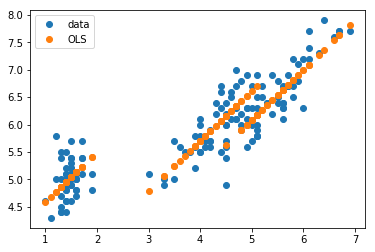

In [31]:
# Plot the regression
#prstd, iv_l, iv_u = wls_prediction_std(res)  # Curves for standard deviation
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(df['petal_length'], df['sepal_length'], 'o', label="data")
ax.plot(df['petal_length'], res.fittedvalues, 'o', label="OLS")
ax.legend(loc='best');

In [34]:
residues = df['petal_length'] - res.predict(df)  # Same as res.resid
print(residues)

0     -3.550107
1     -3.550107
2     -3.559513
3     -3.540702
4     -3.550107
5     -3.520692
6     -3.549508
7     -3.540702
8     -3.550107
9     -3.541301
10    -3.540702
11    -3.531296
12    -3.550707
13    -3.578923
14    -3.568918
15    -3.539503
16    -3.558313
17    -3.549508
18    -3.521291
19    -3.540102
20    -3.521891
21    -3.539503
22    -3.587729
23    -3.520092
24    -3.503080
25    -3.531296
26    -3.530097
27    -3.540702
28    -3.550107
29    -3.531296
         ...   
120   -1.020437
121   -1.097479
122   -0.928182
123   -1.098678
124   -1.021636
125   -0.995219
126   -1.108084
127   -1.098678
128   -1.031042
129   -1.015229
130   -0.985214
131   -0.956398
132   -1.030442
133   -1.081666
134   -1.035239
135   -0.982816
136   -1.029243
137   -1.042246
138   -1.108084
139   -1.049853
140   -1.029243
141   -1.076870
142   -1.079268
143   -1.001626
144   -1.019238
145   -1.067464
146   -1.088673
147   -1.069263
148   -1.048653
149   -1.079867
Length: 150, dtype: floa

The sum of squared residuals (or residual sum of squares) is:

In [37]:
print(np.sum(res.resid**2), res.ssr)

16.6814894448197 16.6814894448197


# Exercises <a id="part4"></a>
## Exercise 1 <a id="part4sec1"></a>
Draw a sample from a chi-squared distribution with 5 degrees of freedom.
Plot the histogram and the probability distribution function on the same figure.

In [ ]:
# Answer

## Exercise 2 <a id="part4sec4"></a>
This exercise proposes to analyse a dataset.
- Load the [R dataset `airquality`](https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/airquality) with `StatsModels` utilities.
- Make columns names pythonic (remove "." from solar.m).
- Drop rows with missing data.
- Display a summary of the dataset.
- Perform a linear regression to explain the ozone variable with solar_r , wind, temp and month (categorical variable).
- Display a summary of the linear regression.
- Predict the air quality for [today](https://www.wolframalpha.com/input/?i=La+Guardia+Airport) (suppose that solar_r = 207.0, convert wind to miles per hour and temp to degrees Fahrenheit by hitting `Show nonmetric`).
Use `res.predict(dict(solar_r=207, …))`

In [ ]:
# Answer

# References <a id="part5"></a>
- [StatsModels documentation](http://statsmodels.sourceforge.net/stable/index.html).
- [Scipy lecture notes](http://www.scipy-lectures.org/index.html).
- To go further: [advanced visualization with Seaborn](https://stanford.edu/~mwaskom/software/seaborn/tutorial.html).